<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 45px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  2. Exploring Data</div>

### 2.1 Import Required Libraries

In [19]:
import requests
import json
import pandas as pd
import numpy as np
import time
import datetime
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

### 2.2 Read csv file into a Pandas Dataframe 

In [20]:
df = pd.read_csv('../Data/air_pollution.csv')

In [21]:
# Dislay 5 first rows
df.head()

,dt,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,1609459200,3,700.95,0.44,35.99,17.35,32.90,20.33,26.64,8.99
1,1609462800,3,847.82,2.46,38.04,18.06,36.24,23.32,30.54,9.37
2,1609466400,3,894.55,5.25,38.39,23.25,41.01,24.16,31.93,9.25
3,1609470000,3,827.79,6.20,36.33,33.98,43.39,23.20,30.91,8.61
4,1609473600,2,660.90,3.69,29.13,54.36,35.76,19.50,25.60,6.21


### 2.3  How many rows and columns are in the dataset?

In [22]:
num_rows, num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 33817
Number of columns: 10


### 2.4 Are there duplicate rows in the dataset?

In [23]:

have_duplicate_rows = bool(df.duplicated().any())
if have_duplicate_rows:
    print('this dataset have duplicate rows')
else:
    print('this dataset does not have duplicate rows')

this dataset does not have duplicate rows


### 2.5 What is the meaning of the data

#### 2.5.1 Meaning of each row

-  Each row in your dataset (with information about air quality) represents a data point collected at a specific time and location, providing details about air pollutants and the Air Quality Index (AQI). 

#### 2.5.2 Meaning of each column


 - AQI:
    - The Air Quality Index (AQI) is a standardized numerical scale used to communicate the quality of air in a given area. It provides an estimate of the impact of air pollution on human health, considering various pollutants such as particulate matter (PM2.5 and PM10), ground-level ozone (O₃), sulfur dioxide (SO₂), nitrogen dioxide (NO₂), and carbon monoxide (CO). The AQI scale ranges from 0 to 500, with higher values indicating poorer air quality and greater health risks.
 - CO (Carbon Monoxide - Monoxit Carbon):

   - Carbon monoxide (CO) is a colorless, odorless gas that is produced by incomplete combustion of carbon-containing materials. In the context of air quality and environmental monitoring, CO is used as a measure to monitor air pollution levels. Elevated levels of CO can indicate poor air quality and pose health risks to humans, particularly affecting the heart and lungs.\.
- NO (Nitric Oxide - Nitơ Oxít) và NO2 (Nitrogen Dioxide - Nitơ Điôxít):

   - NO stands for Nitric Oxide. It is a colorless, odorless gas composed of nitrogen and oxygen atoms. In environmental science and atmospheric chemistry, NO plays a significant role as a primary pollutant in the formation of smog and ground-level ozone. It is also involved in various physiological processes in living organisms. Elevated concentrations of NO can be harmful to human health and the environment.
        
- O3 (Ozone - Ozon):

    - O3 stands for Ozone. It is a triatomic molecule consisting of three oxygen atoms. In the Earth's atmosphere, O3 plays a dual role: it occurs naturally in the stratosphere as the ozone layer, which absorbs and protects against the sun's harmful ultraviolet radiation. At ground level, O3 is considered a pollutant and a major component of smog. High concentrations of O3 can cause respiratory issues, particularly for individuals with asthma or other lung conditions.
        
 - SO2 (Sulfur Dioxide - Lưu huỳnh Điôxít):

   - SO2 stands for Sulfur Dioxide. It is a colorless gas with a pungent, irritating smell. SO2 is produced primarily from burning fossil fuels that contain sulfur, such as coal and oil, as well as from industrial processes like metal smelting. High levels of SO2 in the air can lead to respiratory problems, exacerbate conditions like asthma, and contribute to the formation of acid rain. It also has a significant impact on the environment and can cause damage to crops and buildings.
 - PM 2.5:
    - PM2.5 particles, with diameters smaller than 2.5 micrometers, are capable of penetrating deep into the lungs and entering the bloodstream. These ultrafine particles are associated with severe health effects, particularly on the cardiovascular and pulmonary systems. Chronic exposure increases the risk of conditions such as chronic obstructive pulmonary disease (COPD), asthma, and cardiovascular diseases, significantly contributing to premature mortality.
 - PM10: 
    - PM10 particles, though larger than PM2.5, are still small enough to be inhaled into the respiratory tract. These particles accumulate in the airways, causing irritation, coughing, and exacerbating conditions such as asthma. Long-term exposure to PM10 can lead to substantial respiratory damage and heightened vulnerability to respiratory infections.
          
  - NH3:
      - Ammonia (NH₃) is a pungent gas that can irritate the respiratory tract, causing eye irritation, throat discomfort, and breathing difficulties at elevated concentrations. Prolonged or repeated exposure to ammonia has the potential to cause chronic respiratory issues and damage to lung tissues

### 2.6 Data Type Conversion & Handling Missing Data

#### 2.6.1 What is the data type of each column?

In [24]:
col_dtype =df.dtypes
print(col_dtype)

dt         int64
aqi        int64
co       float64
no       float64
no2      float64
o3       float64
so2      float64
pm2_5    float64
pm10     float64
nh3      float64
dtype: object


#### 2.6.2 Is there any missing data?

- Display number of NA values in each column.

In [25]:
# checking null values
df.isnull().sum()

dt       0
aqi      0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

Good. There aren't any missing data

#### 2.6.3 Are there any invalid data?

- Change the type of collumn 'dt' into datetime 

In [26]:

df['dt'] = pd.to_datetime(df['dt'], unit='s')

# Check the type of all columns
col_dtype =df.dtypes
print(col_dtype)

dt       datetime64[ns]
aqi               int64
co              float64
no              float64
no2             float64
o3              float64
so2             float64
pm2_5           float64
pm10            float64
nh3             float64
dtype: object


- Remove all the row that has negative values

In [27]:
checking_negative_columns = df.select_dtypes(include=['float64']).columns

# Identify rows with negative values in each numeric column
for column in checking_negative_columns :
    negative_values = df[df[column] < 0]
    if negative_values.empty:
        print(f"There are no negative values in the column '{column}'")
    else:
        print(f"The column '{column}' contains negative values:")


There are no negative values in the column 'co'
There are no negative values in the column 'no'
The column 'no2' contains negative values:
The column 'o3' contains negative values:
There are no negative values in the column 'so2'
There are no negative values in the column 'pm2_5'
The column 'pm10' contains negative values:
There are no negative values in the column 'nh3'


In [28]:
#remove negative rows 
mask = (df[checking_negative_columns] < 0).any(axis=1)
cleaned_df = df[~mask]
rows_removed = df.shape[0] - cleaned_df.shape[0]

Column AQI should be 'category'

In [29]:
#Change type of column AQI
cleaned_df['aqi'] = df['aqi'].astype('category')
cleaned_df.dtypes

C:\Users\bkphu\AppData\Local\Temp\ipykernel_11896\2352211823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['aqi'] = df['aqi'].astype('category')


dt       datetime64[ns]
aqi            category
co              float64
no              float64
no2             float64
o3              float64
so2             float64
pm2_5           float64
pm10            float64
nh3             float64
dtype: object

- Save data after cleaned

In [30]:
cleaned_df.to_csv('../Data/air_pollution_cleaned.csv', sep=',', encoding='utf-8', index=False)

### 2.7 For columns with categorical data types, how are the values distributed?

- There is only one column that has categorical data types which is the AQI
- We will calculate the missing ratio compared to the number of elements in that column (ranging from 0 to 1), the number of unique values, and the frequency count of each unique value. The resulting dataframe will have three rows: "missing_ratio", "num_diff_vals", and "value_ratios".

In [31]:
df_categorical = cleaned_df.select_dtypes(include = 'category')
def missing_ratio(series):
    return series.isna().mean() * 100
def num_diff_vals(series):
    return series.nunique()
def value_ratios(series):
    return dict((series.value_counts()))
cate_col_profiles_df = df_categorical.agg([missing_ratio,num_diff_vals,value_ratios])
cate_col_profiles_df

,aqi
missing_ratio,0.0
num_diff_vals,5
value_ratios,"{5: 12108, 2: 7815, 4: 7228, 3: 5637, 1: 1025}"


- It seems to me there is nothing wrong with this.

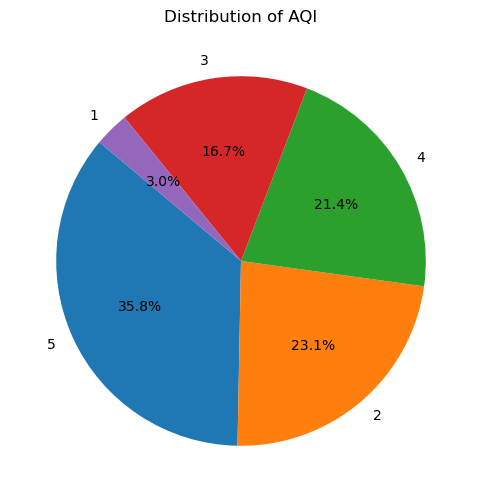

In [32]:
for column in cleaned_df.select_dtypes(include=['category']).columns:
    category_counts = cleaned_df[column].value_counts()

    # PLot 
    plt.figure(figsize=(8, 6))
    category_counts.plot.pie(autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of AQI')
    plt.ylabel('')
    plt.show()

### 2.8 For columns with numeric data types, how are the values distributed?

- There is 8 columns that has numeric data types, which is `co` , `no` , `no2` , `so2` , `o3` , `pm2.5` , `pm10` , `nh3`
- For each numerical column, we will calculate the missing ratio compared to the number of elements in that column (ranging from 0 to 1), the minimum value, and the maximum value. The resulting dataframe will have three rows: "missing_ratio", "min", "max".

In [33]:
df_numerical = cleaned_df.select_dtypes(include=np.number)

num_col_profiles_df = pd.DataFrame(columns=df_numerical.columns)
num_col_profiles_df.loc["missing_ratio"] = df_numerical.isna().mean() * 100
num_col_profiles_df.loc["min"] = np.min(df_numerical, axis=0)
num_col_profiles_df.loc["lower_quartile"] = df_numerical .quantile(0.25)
num_col_profiles_df.loc["median"] = df_numerical.median()
num_col_profiles_df.loc["upper_quartile"] = df_numerical .quantile(0.75)
num_col_profiles_df.loc["max"] = np.max(df_numerical, axis=0)
num_col_profiles_df


,co,no,no2,o3,so2,pm2_5,pm10,nh3
missing_ratio,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,317.10,0.00,6.34,0.00,5.84,3.45,4.41,1.52
lower_quartile,687.60,1.65,24.33,0.02,26.70,21.43,28.80,6.02
median,1028.06,9.28,33.24,4.34,38.15,40.09,51.15,8.61
upper_quartile,1762.39,32.63,45.93,31.83,56.74,79.43,97.37,12.92
max,18585.21,393.39,213.86,446.32,270.84,936.13,1034.27,186.44


- This seems fine to me. There is nothing to worry about

### 2.9 Descriptive statistics.

In [34]:

df_copy = cleaned_df.drop(['dt', 'aqi'], axis='columns')

# Descriptive statistics.
statistics = df_copy.describe(include='all')
statistics

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,33813.000000,33813.000000,33813.000000,33813.000000,33813.000000,33813.000000,33813.000000,33813.000000
mean,1551.622618,25.209962,38.514035,24.824856,46.140866,67.881627,82.239045,11.156338
std,1505.860446,39.017120,21.583975,42.397874,28.691124,81.232424,91.478519,9.780257
min,317.100000,0.000000,6.340000,0.000000,5.840000,3.450000,4.410000,1.520000
25%,687.600000,1.650000,24.330000,0.020000,26.700000,21.430000,28.800000,6.020000
50%,1028.060000,9.280000,33.240000,4.340000,38.150000,40.090000,51.150000,8.610000
75%,1762.390000,32.630000,45.930000,31.830000,56.740000,79.430000,97.370000,12.920000
max,18585.210000,393.390000,213.860000,446.320000,270.840000,936.130000,1034.270000,186.440000
